In [ ]:
import os
import csv
from collections import defaultdict
import shutil
import random
import os
from PIL import Image, ImageEnhance
import os
import imghdr
import random


Creating good and bad folders:

In [ ]:
# All of these paths contain bad images
source_dirs_bad = [
    "/content/drive/MyDrive/Original Embryo data/ed1/alldata/1",
    "/content/drive/MyDrive/Original Embryo data/ed1/alldata/2",
    "/content/drive/MyDrive/Original Embryo data/ed2/alldata/1",
    "/content/drive/MyDrive/Original Embryo data/ed2/alldata/2",
    "/content/drive/MyDrive/Original Embryo data/ed3/alldata/1",
    "/content/drive/MyDrive/Original Embryo data/ed4/alldata/1",
    "/content/drive/MyDrive/Original Embryo data/ed4/alldata/2"
]

# Put them in the bad folder
destination_dir_bad = "/content/drive/MyDrive/Embryo data/bad"


# All of these paths contain good images
source_dirs_good = [
    "/content/drive/MyDrive/Original Embryo data/ed1/alldata/3",
    "/content/drive/MyDrive/Original Embryo data/ed1/alldata/4",
    "/content/drive/MyDrive/Original Embryo data/ed1/alldata/5",
    "/content/drive/MyDrive/Original Embryo data/ed2/alldata/3",
    "/content/drive/MyDrive/Original Embryo data/ed2/alldata/4",
    "/content/drive/MyDrive/Original Embryo data/ed2/alldata/5",
    "/content/drive/MyDrive/Original Embryo data/ed3/alldata/2",
    "/content/drive/MyDrive/Original Embryo data/ed4/alldata/3",
    "/content/drive/MyDrive/Original Embryo data/ed4/alldata/4",
    "/content/drive/MyDrive/Original Embryo data/ed4/alldata/5"
]

# Put them in the good folder
destination_dir_good = "/content/drive/MyDrive/Embryo data/good"

# Ensure good and bad folders exist
os.makedirs(destination_dir_bad, exist_ok=True)
os.makedirs(destination_dir_good, exist_ok=True)

# Initialize counters
counter_bad = 0
counter_good = 0

# Copy files from the original embryo dataset folder to the new embryo dataset folder for bad files
for source_dir in source_dirs_bad:
    for file_name in os.listdir(source_dir):
        source_file = os.path.join(source_dir, file_name)
        if os.path.isfile(source_file):
            counter_bad += 1
            # Create the destination file path with the counter and 'bad' as the new name
            destination_file = os.path.join(destination_dir_bad, f"{counter_bad}_bad{os.path.splitext(file_name)[1]}")
            shutil.copy(source_file, destination_file)
            print(f"Copied {source_file} to {destination_file}")

# Copy files from the original embryo dataset folder to the new embryo dataset folder for good files
for source_dir in source_dirs_good:
    for file_name in os.listdir(source_dir):
        source_file = os.path.join(source_dir, file_name)
        if os.path.isfile(source_file):
            counter_good += 1
            # Create the destination file path with the counter and 'good' as the new name
            destination_file = os.path.join(destination_dir_good, f"{counter_good}_good{os.path.splitext(file_name)[1]}")
            shutil.copy(source_file, destination_file)
            print(f"Copied {source_file} to {destination_file}")

print("All files have been copied successfully.")


Copied /content/drive/MyDrive/Original Embryo data/ed1/alldata/1/56.png to /content/drive/MyDrive/Embryo data/bad/1_bad.png
Copied /content/drive/MyDrive/Original Embryo data/ed1/alldata/1/333.png to /content/drive/MyDrive/Embryo data/bad/2_bad.png
Copied /content/drive/MyDrive/Original Embryo data/ed1/alldata/1/123.png to /content/drive/MyDrive/Embryo data/bad/3_bad.png
Copied /content/drive/MyDrive/Original Embryo data/ed1/alldata/1/331.png to /content/drive/MyDrive/Embryo data/bad/4_bad.png
Copied /content/drive/MyDrive/Original Embryo data/ed1/alldata/1/223.png to /content/drive/MyDrive/Embryo data/bad/5_bad.png
Copied /content/drive/MyDrive/Original Embryo data/ed1/alldata/1/339.png to /content/drive/MyDrive/Embryo data/bad/6_bad.png
Copied /content/drive/MyDrive/Original Embryo data/ed1/alldata/1/370.png to /content/drive/MyDrive/Embryo data/bad/7_bad.png
Copied /content/drive/MyDrive/Original Embryo data/ed1/alldata/1/197.png to /content/drive/MyDrive/Embryo data/bad/8_bad.png
C

In [ ]:
# Paths to the good and bad folders
good_path = "/content/drive/MyDrive/Embryo data/good"
bad_path = "/content/drive/MyDrive/Embryo data/bad"

# Counting number of images in good and bad folders
print("Before Augmentation:")
print("Number of images in the good folder is", len(os.listdir(good_path)))
print("Number of images in the bad folder is", len(os.listdir(bad_path)))


Before Augmentation:
Number of images in the good folder is 1926
Number of images in the bad folder is 1137


Performing data augmentation:

In [ ]:
cd/content/drive/MyDrive/Embryo data

/content/drive/MyDrive/Embryo data


In [ ]:
# Define the augmentation operations
def augment_image(image_path, output_path, count):
    with Image.open(image_path) as img:
        # Flip horizontally
        flipped_img = img.transpose(Image.FLIP_LEFT_RIGHT)

        # Rotate by 90 degrees
        rotated_img = flipped_img.rotate(90)

        # Adjust brightness
        enhancer = ImageEnhance.Brightness(rotated_img)
        bright_img = enhancer.enhance(random.uniform(0.7, 1.3))

        # Adjust contrast
        enhancer = ImageEnhance.Contrast(bright_img)
        contrast_img = enhancer.enhance(random.uniform(0.7, 1.3))

        # Save the augmented image
        contrast_img.save(os.path.join(output_path, f"augmented_{count}_{os.path.basename(image_path)}"))

# Output folders
output_folders = {
    'good': 'good',
    'bad': 'bad'
}

# Number of new images to create
num_new_images = {
    'good': 100,
    'bad': 900
}

# Ensure the output folders exist
for output_folder in output_folders.values():
    os.makedirs(output_folder, exist_ok=True)

# Perform data augmentation
folders = ['good', 'bad']
for folder_name in folders:
    output_folder = output_folders[folder_name]
    count = 0
    for filename in os.listdir(folder_name):
        image_path = os.path.join(folder_name, filename)
        if imghdr.what(image_path):  # Check if the file is an image
            augment_image(image_path, output_folder, count)
            count += 1
            if count >= num_new_images[folder_name]:
                break

print('Data augmentation completed.')


Data augmentation completed.


In [ ]:
# Paths to the good and bad folders
good_path = "/content/drive/MyDrive/Embryo data/good"
bad_path = "/content/drive/MyDrive/Embryo data/bad"

# Counting number of images in good and bad folders
print("After Augmentation:")
print("Number of images in the good folder is", len(os.listdir(good_path)))
print("Number of images in the bad folder is", len(os.listdir(bad_path)))


After Augmentation:
Number of images in the good folder is 2023
Number of images in the bad folder is 2034


Splitting into training and testing:

In [ ]:
# Create train and test folders if they don't exist
train_path = "train"
test_path = "test"
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Define the paths to the train and test folders for 'good' and 'bad' images
train_good_path = os.path.join(train_path, 'good')
test_good_path = os.path.join(test_path, 'good')
train_bad_path = os.path.join(train_path, 'bad')
test_bad_path = os.path.join(test_path, 'bad')

# Create train and test folders for 'good' and 'bad' images
os.makedirs(train_good_path, exist_ok=True)
os.makedirs(test_good_path, exist_ok=True)
os.makedirs(train_bad_path, exist_ok=True)
os.makedirs(test_bad_path, exist_ok=True)


In [ ]:
import os
import csv
from collections import defaultdict
import shutil
import random
import os
from PIL import Image, ImageEnhance
import os
import imghdr
import random

# Split ratio 80% train, 20% test
split_ratio = 0.8

# Function to split images into train and test sets
def split_images(source_path, train_dest_path, test_dest_path):
    # Get the list of images in the 'good' or 'bad' folder
    images = os.listdir(source_path)

    # Shuffle the list of images
    random.shuffle(images)

    # Calculate the split index
    split_idx = int(len(images) * split_ratio)

    # Split the images into train and test sets
    train_images = images[:split_idx]
    test_images = images[split_idx:]

    # Copy the train images to the train destination folder
    for image in train_images:
        src = os.path.join(source_path, image)
        dst = os.path.join(train_dest_path, image)
        shutil.copyfile(src, dst)

    # Copy the test images to the test destination folder
    for image in test_images:
        src = os.path.join(source_path, image)
        dst = os.path.join(test_dest_path, image)
        shutil.copyfile(src, dst)

    # Return the number of training and testing images
    return len(train_images), len(test_images)

# Split 'good' images into train and test sets
train_good_count, test_good_count = split_images(good_path, train_good_path, test_good_path)
# Split 'bad' images into train and test sets
train_bad_count, test_bad_count = split_images(bad_path, train_bad_path, test_bad_path)


print("Number of good images in train set: ", len(os.listdir("train/good")))
print("Number of good images in test set: ", len(os.listdir("test/good")))
print("Number of bad images in train set: ", len(os.listdir("train/bad")))
print("Number of bad images in test set: ", len(os.listdir("test/bad")))


Number of good images in train set: 1618
Number of good images in test set: 405
Number of bad images in train set: 1627
Number of bad images in test set: 407


# The model

In [ ]:
# Necessary libraries

import os
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
!pip install utils
from utils import *
from glob import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from itertools import chain
from datetime import datetime
import statistics
from tqdm import tqdm
import tensorflow as tf
import seaborn as sns

from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC, BinaryCrossentropy, FalseNegatives, FalsePositives
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201, VGG16, ResNet50
from keras import backend as K
from tensorflow.keras import Sequential
import keras
import matplotlib
from sklearn.metrics import roc_curve, auc, roc_auc_score
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report


  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=324f27c42da88c1aa0712d580fd1bb8bcc360f512f06d72bfaffd9fffa41fb5e
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [ ]:
cd/content/drive/MyDrive/Embryo data

/content/drive/.shortcut-targets-by-id/1PoZmslPF3uGwsGqOf1Ijeio6u8hSW2-W/Embryo data


In [ ]:
image_size = (224, 224) # the model requires this
batch_size = 32

train_df = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    validation_split = 0.20, # split 20%
    subset = "training", # this means that this subset that we're talking is for training (80%)
    seed = 1337, # so the splitting isn't random each time
    image_size = image_size,
    batch_size = batch_size,
)

val_df = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    validation_split = 0.20, # split 20%
    subset = "validation", # this means that this subset that we're talking is for validation (20%)
    seed = 1337, # so the splitting isn't random each time
    image_size = image_size,
    batch_size = batch_size,
)

test_df = tf.keras.preprocessing.image_dataset_from_directory(
    "test",
    image_size = image_size,
    batch_size = batch_size,
    shuffle = False, # really important for testing
)

# the output means: 2596 training, 649 validation, 812 testing

Found 3245 files belonging to 2 classes.
Using 2596 files for training.
Found 3245 files belonging to 2 classes.
Using 649 files for validation.
Found 812 files belonging to 2 classes.


In [ ]:
# test_df returns both X and Y
# we want this Y which we will call "y_true": y_true refers to the true labels in test
# we need to save them in a variable to compare with y_pred after testing

y_true = np.concatenate([y for x,y in test_df], axis=0)

In [ ]:
# this reduces the time spent waiting for data to be loaded

train_df = train_df.prefetch(buffer_size=32)
val_df = val_df.prefetch(buffer_size=32)

In [ ]:
# hyperparameters

IMG_IND = 224 # size
IMG_SHAPE = (IMG_IND, IMG_IND, 3)
LOSS = BinaryCrossentropy() # because this is a binary calsssifation problem
IMG_SIZE = (224, 224)
SEED = 2
BATCH_SIZE = 16

In [ ]:
# function that takes a model name and applies it (only necessary when applying multiple models)

def get_callbacks(model_name):
    os.makedirs("/content/drive/MyDrive/Embryo data/models", exist_ok=True)
    filepath_h5 = os.path.join("/content/drive/MyDrive/Embryo data/models", f'model.{model_name}.h5')
    filepath_keras = os.path.join("/content/drive/MyDrive/Embryo data/models", f'model.{model_name}.keras')


    callbacks = []
    # Checkpoint callback to save the model in .h5 format
    checkpoint_h5 = tf.keras.callbacks.ModelCheckpoint(filepath=filepath_h5, save_best_only=True, verbose=1, monitor='val_loss', mode='min')
    callbacks.append(checkpoint_h5)

    # Checkpoint callback to save the model in .keras format
    checkpoint_keras = tf.keras.callbacks.ModelCheckpoint(filepath=filepath_keras, save_best_only=True, verbose=1, monitor='val_loss', mode='min')
    callbacks.append(checkpoint_keras)

    # ReduceLROnPlateau callback to reduce learning rate gradually
    anne = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=2, min_lr=0.0000001, min_delta=0.00001, mode='auto', cooldown=0)
    # cooldown=0 means the callback will apply the new learning rate immediately after the previous one
    callbacks.append(anne)

    # EarlyStopping callback to stop training when a monitored metric has stopped improving
    earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    # if after 10 times there is no improvement, stop
    callbacks.append(earlystop)

    return callbacks


In [ ]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2

# Define the optimizer
OPTIMIZER = RMSprop(learning_rate=0.005, rho=0.9)

# Load base model
base_model = ResNet101(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

base_model.trainable = False

x = base_model.output

x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)

x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid', name='Final')(x)

# Build the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])


171446536/171446536 [==============================] - 1s 0us/step


In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
callbacks = get_callbacks('resnet101') # calling the function i made earlier

history = model.fit(train_df, epochs=20, validation_data=val_df, callbacks=[callbacks])

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_df)

Epoch 1/20
81/82 [============================>.] - ETA: 0s - loss: 0.0381 - accuracy: 0.9865
Epoch 1: val_loss improved from inf to 0.28060, saving model to /content/drive/MyDrive/Embryo data/models/model.resnet101.h5

Epoch 1: val_loss improved from inf to 0.28060, saving model to /content/drive/MyDrive/Embryo data/models/model.resnet101.keras
82/82 [==============================] - 58s 703ms/step - loss: 0.0380 - accuracy: 0.9865 - val_loss: 0.2806 - val_accuracy: 0.9260 - lr: 0.0012
Epoch 2/20
81/82 [============================>.] - ETA: 0s - loss: 0.0215 - accuracy: 0.9919
Epoch 2: val_loss did not improve from 0.28060

Epoch 2: val_loss did not improve from 0.28060
82/82 [==============================] - 21s 247ms/step - loss: 0.0216 - accuracy: 0.9919 - val_loss: 0.4253 - val_accuracy: 0.9014 - lr: 0.0012
Epoch 3/20
82/82 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9938
Epoch 3: val_loss did not improve from 0.28060

Epoch 3: val_loss did not impro

Test Accuracy: 0.9199507236480713


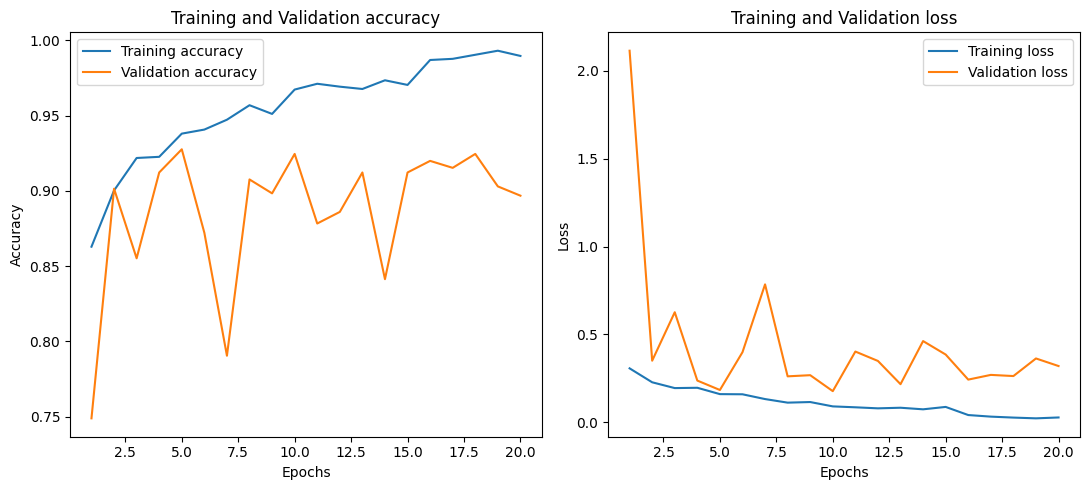

In [ ]:
# Print the test accuracy
print(f"Test Accuracy: {test_accuracy}")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

# Train and validation accuracy
ax1.plot(epochs, acc, label='Training accuracy')
ax1.plot(epochs, val_acc, label='Validation accuracy')
ax1.set_title('Training and Validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Train and validation loss
ax2.plot(epochs, loss, label='Training loss')
ax2.plot(epochs, val_loss, label='Validation loss')
ax2.set_title('Training and Validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()


26/26 [==============================] - 6s 166ms/step


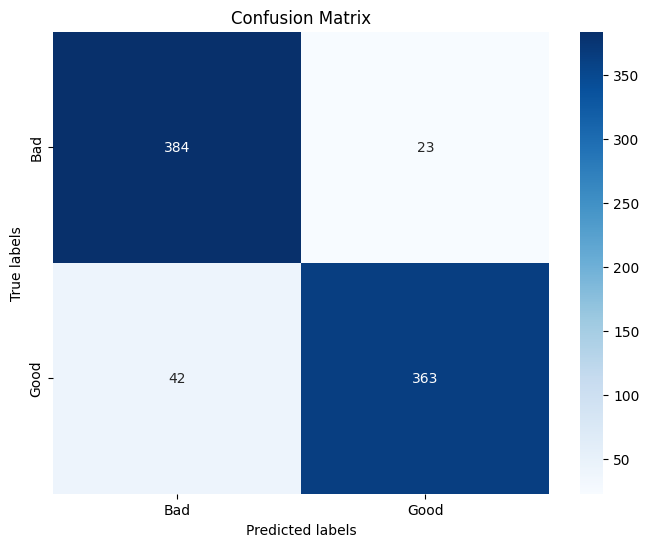

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       407
           1       0.94      0.90      0.92       405

    accuracy                           0.92       812
   macro avg       0.92      0.92      0.92       812
weighted avg       0.92      0.92      0.92       812



In [ ]:
# Make predictions on the test data
predictions = model.predict(test_df)
predictions_binary = np.round(predictions).flatten()

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, predictions_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print(classification_report(y_true, predictions_binary))
